In [1]:
#Import useful libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Import the dataset and conform that the data loaded correctly
df = pd.read_csv("C:/Users/dv/Desktop/Projects  Data analysis/Python/Customer Segmentation and Clustering/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#check for null values
pd.isnull(df).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Univariate Analysis.

In [5]:
# Describe the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


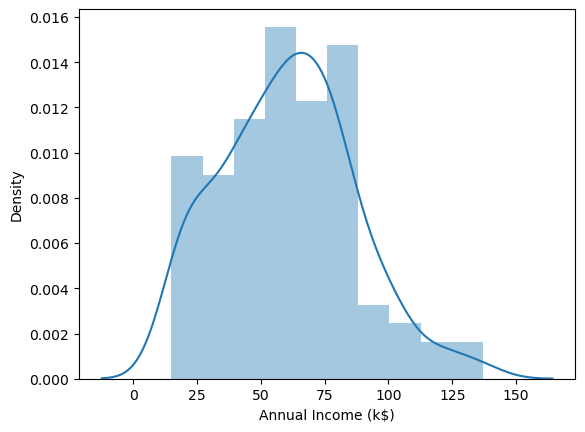

In [6]:
#Histogram to display the frequency distribution of 'Annual income' variable
sns.distplot(df['Annual Income (k$)']);

In [7]:
#Columns in the dataset
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

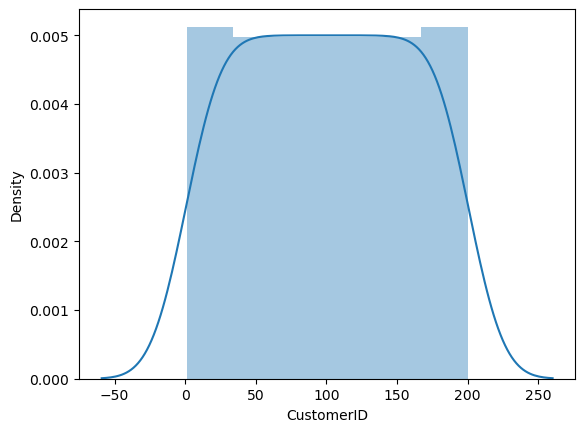

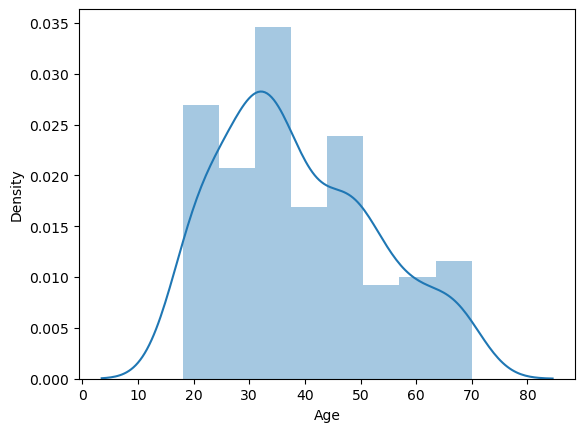

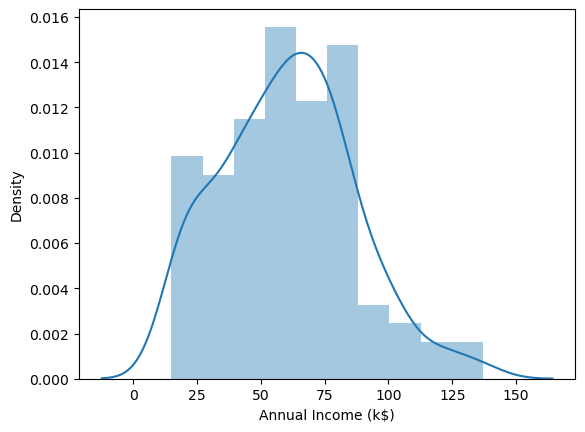

In [8]:
#Histogram plots for each of the dataset numerical variables.
columns=['CustomerID', 'Age', 'Annual Income (k$)']
for i in columns:
         plt.figure()
         sns.distplot(df[i])

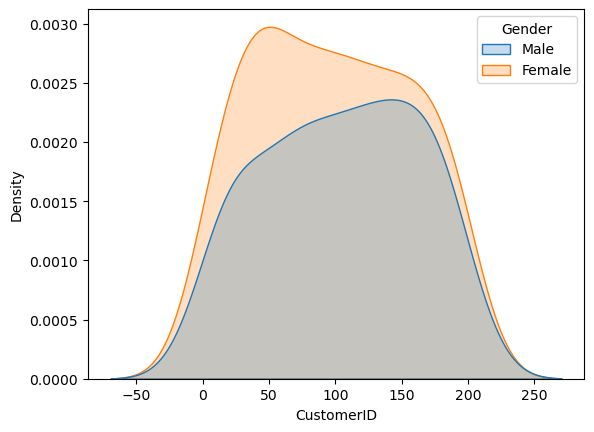

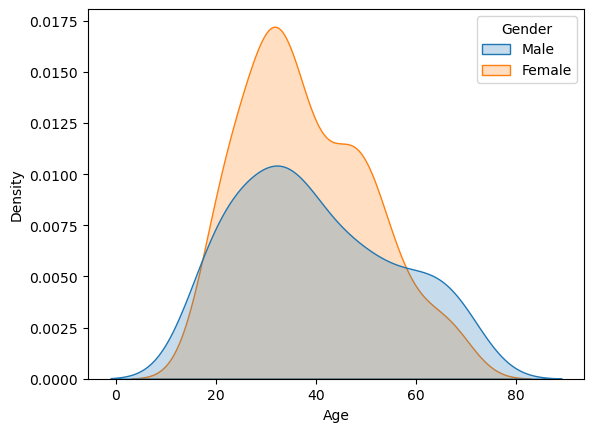

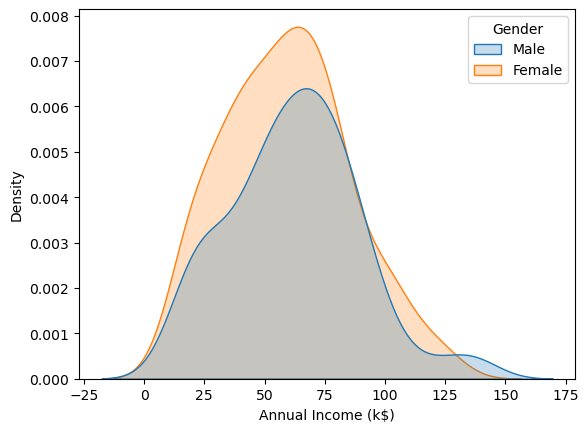

In [9]:
#KDE Plots for each of the numerical dataset variables.
olumns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

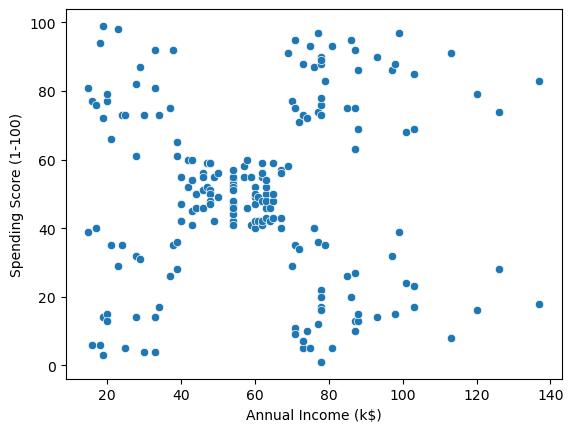

In [11]:
#Scatter plot to show the relationship between 'Annual Income and 'Spending score'
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

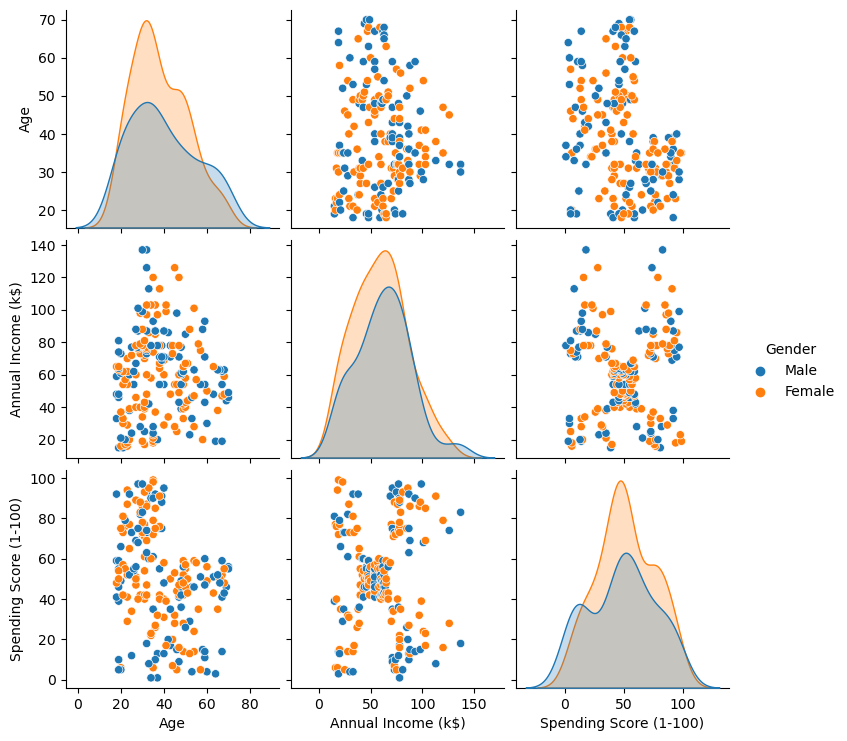

In [12]:
#pairplots for the variables in the dataset
df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [13]:
#Mean values for the numerical data variables,grouped by gender.
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
#Correlation between the variables
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

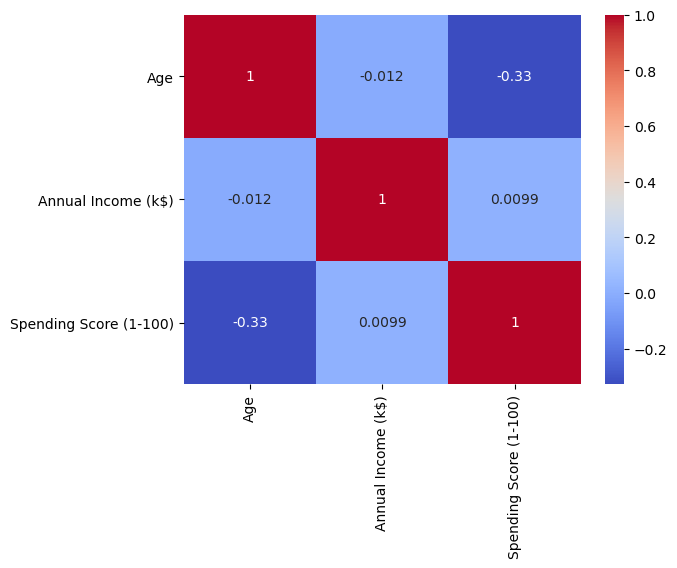

In [15]:
#Heatmap to display the correlation of variables.
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering-Univariate,Bivariate,Multivariate

## Univariate Clustering

In [16]:
#For loop to determine the intertia scores for  clusters between the range of 1-11.
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [17]:
#Obtain the intertia scores.
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3949.275613275612,
 2822.4996947496966,
 2384.4341575091576,
 1736.5656510156518]

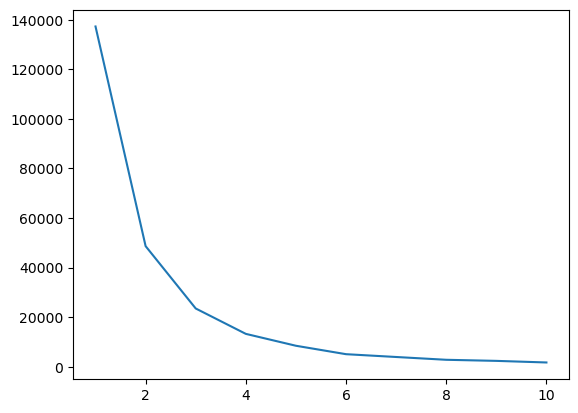

In [18]:
#Plot the intertia score to obtain the most suitable cluster number,this is through the elbow method.
plt.plot(range(1,11),intertia_scores)

In [19]:
#Initiate my algorithm
clustering1 = KMeans(n_clusters=3)

In [20]:
#Fit my algorithm into the data
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
#Label data values according to their clusters
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [22]:
# Add an 'Income Cluster' column that contains clustered data values.
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [23]:
#Obtain the number of data values in each column.
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [24]:
#Summary statistics of the clusters obtained.
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


## Bivariate Clustering

In [25]:
#Initiate clustering algorithm,fit the data values,label clusters and create new column.
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,4
2,Female,20,16,6,1,3
3,Female,23,16,77,1,4
4,Female,31,17,40,1,3


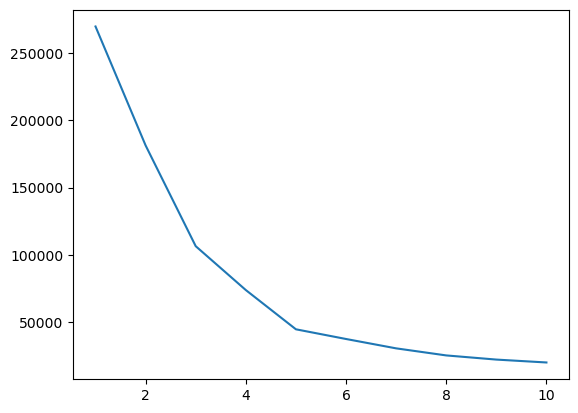

In [26]:
#Obtain the appropriate number of clusters for the dataset using the elbow method.
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [27]:
#Scatter plot to display the relationship between the 'Spending score' and 'Annual Income'.
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

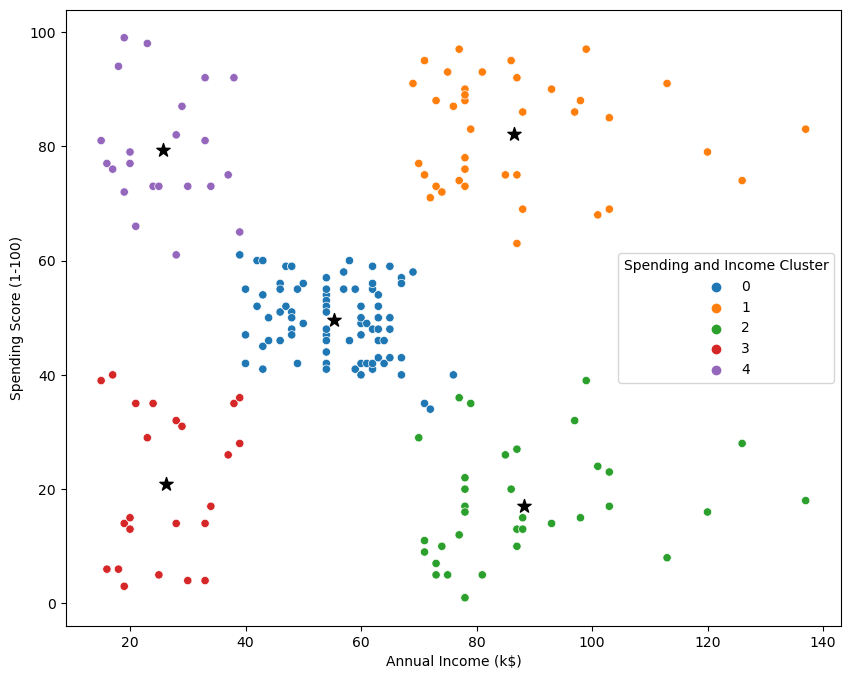

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [29]:
#Compare the male and female gender by the 'Spending and Income Cluster'.
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [30]:
#Group the variables by the 'Spending and Income' Cluster.
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


## Multivariate Clustering

In [31]:
#Import useful libary for multivariate clustering.
from sklearn.preprocessing import StandardScaler

In [32]:
#Initialize the algorithm.
scale = StandardScaler()

In [33]:
#Preview the current dataset.
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,4
2,Female,20,16,6,1,3
3,Female,23,16,77,1,4
4,Female,31,17,40,1,3


In [34]:
#Represent the non-numerical column data values with dummies&Drop the 'Gender_Female' column as it is identicale to the 'Gender_Male' column.
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,3,1
1,21,15,81,1,4,1
2,20,16,6,1,3,0
3,23,16,77,1,4,0
4,31,17,40,1,3,0


In [35]:
#Truncate the dataset to remain with only relevant columns.
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [36]:
#Fit the dataset and scale the data values.
dff = scale.fit_transform(dff)

In [37]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


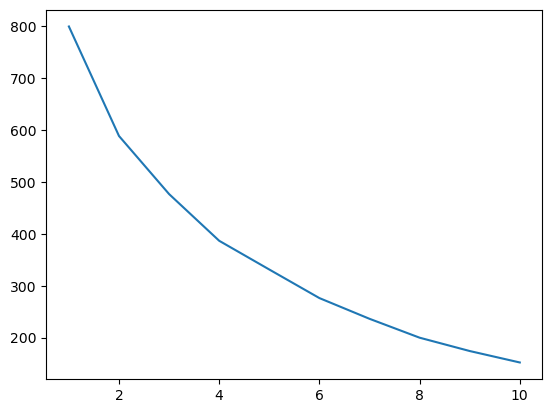

In [38]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [43]:
#Begin clustering the new scaled dataset.
clustering3 = KMeans(n_clusters=3)
clustering3.fit(dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']])
df['Multivariate Cluster'] =clustering3.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,Male,19,15,39,1,3,1
1,Male,21,15,81,1,4,1
2,Female,20,16,6,1,3,1
3,Female,23,16,77,1,4,1
4,Female,31,17,40,1,3,1


KeyError: 'Multivariate Cluster'